# Sleep Analysis

A study of sleep efficiency, and sleep patterns.

## About Dataset

The dataset contains information about a group of test subjects and their sleep patterns. Each test subject is identified by a unique "Subject ID" and their age and gender are also recorded. The "Bedtime" and "Wakeup time" features indicate when each subject goes to bed and wakes up each day, and the "Sleep duration" feature records the total amount of time each subject slept in hours. The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep. The "Awakenings" feature records the number of times each subject wakes up during the night. Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.

There are 452 observations of 14 variables.  Awakenings has 20 missing values, Caffeine consumption has 25 missing values, Alcohol consumption has 14 missing values, Exercise frequency has 6 missing values.

## Objective

A typical adult needs 1.5 to 2 hours of deep sleep and 1.5 to 2 hours of REM sleep. There is no minimum amout of light sleep defined for a quality night of sleep. A label will be created called Sleep Quality that defines the provides percentage of required sleep achieved. In the case of someone with at least 1.5 hours of deep sleep and 1.5 hours of REM sleep they will receive a Sleep Quality rating of 100%. If someone has 1 hour of deep sleep and 1.5 hours of REM sleep they will receive a Sleep Quality rating of 83%.

$Sleep Quality = \frac{\min\{\frac{Deep Sleep}{1.5}, 1\} + \min\{\frac{REM Sleep}{1.5}, 1\}}{2}*100$

The objective of this analysis will be to determine which features impact the Sleep Quality the most and to be able to predict the sleep quality.

In [63]:
from IPython.display import clear_output

In [64]:
%%time
%pip install kagglehub
%pip install ipywidgets
%pip install pandas
%pip install seaborn
%pip install plotly
%pip install statsmodels
%pip install nbformat>=4.2.0
clear_output()

CPU times: total: 125 ms
Wall time: 7.64 s


In [65]:
import kagglehub
import shutil
import os

# Download latest version
path = kagglehub.dataset_download("equilibriumm/sleep-efficiency")
destination = r"data"
for item in os.listdir(path):
    src = os.path.join(path, item)
    dest = os.path.join(destination, item)
    if os.path.isdir(src):
        shutil.copytree(src, dest, dirs_exist_ok=True)
    else:
        shutil.copy2(src, dest)

In [66]:
import pandas as pd

sleep_df = pd.read_csv(r"data\Sleep_Efficiency.csv").set_index("ID")
sleep_df["Bedtime"] = pd.to_datetime(sleep_df["Bedtime"]).dt.time
sleep_df["Wakeup time"] = pd.to_datetime(sleep_df["Wakeup time"]).dt.time
sleep_df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
ID,,,,,,,,,,,,,,
1,65,Female,01:00:00,07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
2,69,Male,02:00:00,09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
3,40,Female,21:30:00,05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
4,40,Female,02:30:00,08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
5,57,Male,01:00:00,09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,27,Female,22:00:00,05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
449,52,Male,21:00:00,03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
450,40,Female,23:00:00,07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0


In [67]:
sleep_df.describe()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [68]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 1 to 452
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    object 
 2   Bedtime                 452 non-null    object 
 3   Wakeup time             452 non-null    object 
 4   Sleep duration          452 non-null    float64
 5   Sleep efficiency        452 non-null    float64
 6   REM sleep percentage    452 non-null    int64  
 7   Deep sleep percentage   452 non-null    int64  
 8   Light sleep percentage  452 non-null    int64  
 9   Awakenings              432 non-null    float64
 10  Caffeine consumption    427 non-null    float64
 11  Alcohol consumption     438 non-null    float64
 12  Smoking status          452 non-null    object 
 13  Exercise frequency      446 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory usage

In [69]:
sleep_df["Sleep Quality"] = sleep_df.apply(
    lambda row: (
        min((row["Sleep duration"] * row["REM sleep percentage"] / 100) / 1.5, 1)
        + min((row["Sleep duration"] * row["Deep sleep percentage"] / 100) / 1.5, 1)
    )
    / 2 * 100,
    axis=1,
)
sleep_df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Sleep Quality
ID,,,,,,,,,,,,,,,
1,65,Female,01:00:00,07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,86.000000
2,69,Male,02:00:00,09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,94.333333
3,40,Female,21:30:00,05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,100.000000
4,40,Female,02:30:00,08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,96.000000
5,57,Male,01:00:00,09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,27,Female,22:00:00,05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0,100.000000
449,52,Male,21:00:00,03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0,100.000000
450,40,Female,23:00:00,07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0,100.000000


## Exploratory Data Analysis



In [70]:
import plotly.express as px

continous_columns = (
    "Bedtime",
    "Wakeup time",
    "Sleep duration",
    "Sleep efficiency",
    "REM sleep percentage",
    "Deep sleep percentage",
    "Light sleep percentage",
    "Awakenings",
    "Caffeine consumption",
    "Alcohol consumption",
    "Exercise frequency",
)

for col in continous_columns:
    fig1 = px.scatter(sleep_df, col, "Sleep Quality")
    fig1.show()

In [71]:
cat_columns = ("Age", "Gender", "Smoking status")

for col in cat_columns:
    fig2 = px.box(sleep_df, col, "Sleep Quality")
    fig2.show()

<Axes: >

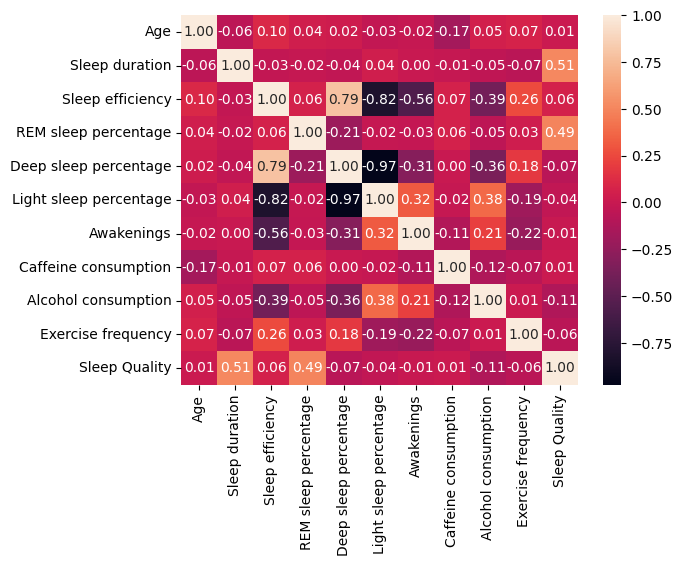

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(sleep_df.corr(numeric_only=True), annot=True, fmt=".2f")

## Linear Models

A linear regression model, Ridge Regression model, LASSO Regression model, and Elasctic Net Regression model will be used to evaluate the sleep variables and predict sleep quality.

In [73]:
random_state = 619
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import stats
import numpy as np

In [121]:
def evaluate_model(X, y, model):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

    numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
    categorical_cols = X.select_dtypes(include=["object", "category"]).columns
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numerical_cols),
            ("cat", OneHotEncoder(), categorical_cols),
        ]
    )

    X_train_scaled = preprocessor.fit_transform(X_train)
    X_test_scaled = preprocessor.transform(X_test)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    model_mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    model_r2score = r2_score(y_true=y_test, y_pred=y_pred)

    try:
        coeff = model.coef_
    except AttributeError:
        coeff = {}

    return model_mse, model_r2score, y_pred, y_test, dict(zip(X.columns, coeff))

In [100]:
def check_assumptions(y_pred, y_true):
    sns.scatterplot(x=y_pred, y=(y_true - y_pred))
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

    sm.qqplot((y_true - y_pred), line='s')

Linear Regression model with missing values set to 0 has a MSE of 7.222323612686763 and R2 of 0.5357704019079745
Age 0.06187967154412703
Gender 1.9899944091362678
Bedtime 0.1664779229946883
Wakeup time 1.8787799015787885
Sleep duration -0.12778303700958188
Sleep efficiency -0.30104969783363855
REM sleep percentage 0.15346828778954735
Deep sleep percentage -0.0370923745250567
Light sleep percentage -0.16910069625644167
Awakenings -0.29765553205154527
Caffeine consumption 0.22657504427653702
Alcohol consumption -0.22657504427655378
Smoking status -1.218537854363507
Exercise frequency -1.983021616331831


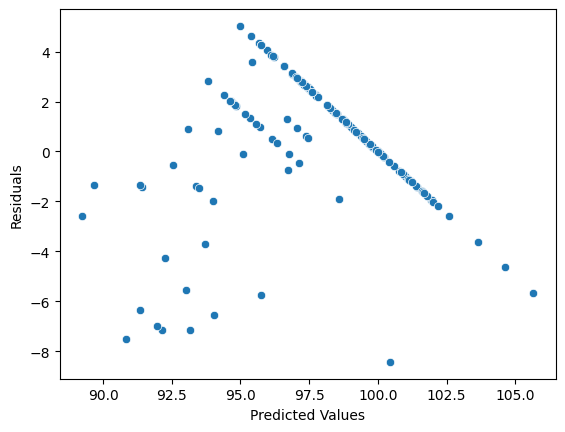

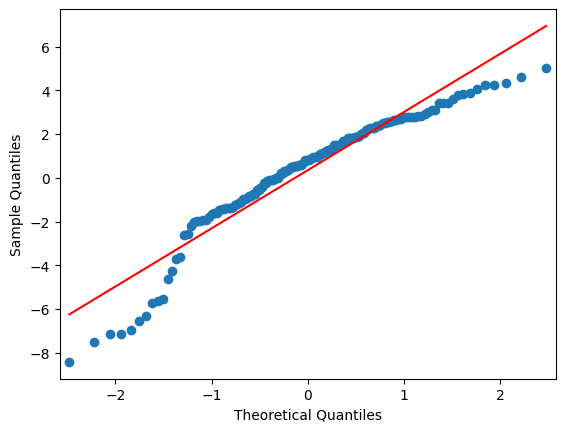

In [101]:
X = sleep_df.drop("Sleep Quality", axis=1).fillna(0)
y = sleep_df.loc[:, "Sleep Quality"]

model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(X, y, LinearRegression())
print(f"Linear Regression model with missing values set to 0 has a MSE of {model_mse} and R2 of {model_r2}")

for coefficient, value in coeff.items():
    print(coefficient, value)

check_assumptions(y_pred, y_test)

Linear Regression model with missing values set to mean has a MSE of 7.209592837346577 and R2 of 0.5365886984890351
Age 0.05057155338631942
Gender 1.977751081295378
Bedtime 0.2549900543458886
Wakeup time 1.86397889193666
Sleep duration -0.15180048968112347
Sleep efficiency -0.2731003541121983
REM sleep percentage 0.23324392904950758
Deep sleep percentage -0.10141834643040556
Light sleep percentage -0.24178267025808559
Awakenings -0.3414502276867223
Caffeine consumption 0.22568674699734628
Alcohol consumption -0.22568674699738536
Smoking status -1.2536329276285565
Exercise frequency -1.970334033691036


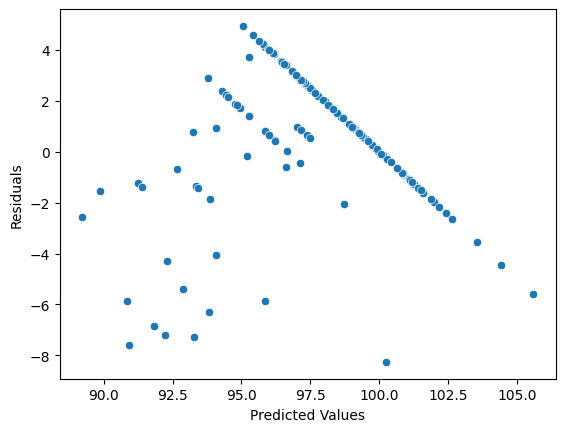

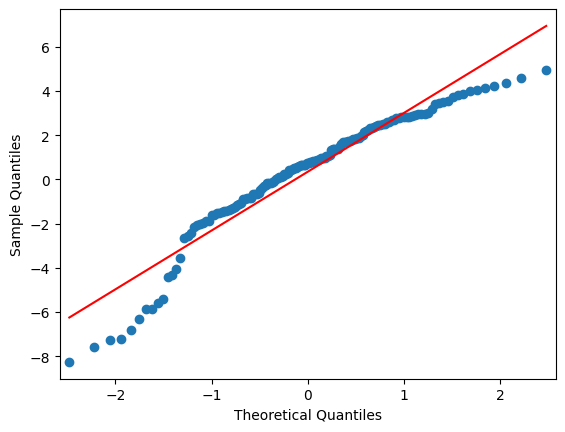

In [102]:
X = sleep_df.copy().drop("Sleep Quality", axis=1)
X["Awakenings"] = X["Awakenings"].fillna(X["Awakenings"].mean())
X["Alcohol consumption"] = X["Alcohol consumption"].fillna(X["Alcohol consumption"].mean())
X["Caffeine consumption"] = X["Caffeine consumption"].fillna(X["Caffeine consumption"].mean())
X["Exercise frequency"] = X["Exercise frequency"].fillna(X["Exercise frequency"].mean())
y = sleep_df.copy().loc[:, "Sleep Quality"]

model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(X, y, LinearRegression())
print(f"Linear Regression model with missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}")

for coefficient, value in coeff.items():
    print(coefficient, value)

check_assumptions(y_pred, y_test)

Ridge Regression model with missing values set to mean has a MSE of 7.25662583334707 and R2 of 0.5335655566303652
Age 0.04728077832058259
Gender 2.001895451527038
Bedtime 0.2314497151151624
Wakeup time 1.868721629722612
Sleep duration -0.14105075569239675
Sleep efficiency -0.2851775481444688
REM sleep percentage 0.23994167261245153
Deep sleep percentage -0.10240415895376731
Light sleep percentage -0.23222399879616556
Awakenings -0.33210840028972616
Caffeine consumption 0.2350692341779453
Alcohol consumption -0.23506923417791423
Smoking status -1.1287210956133376
Exercise frequency -1.8144824668325297


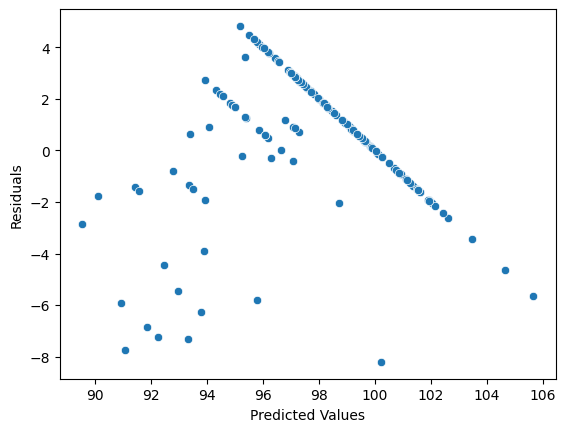

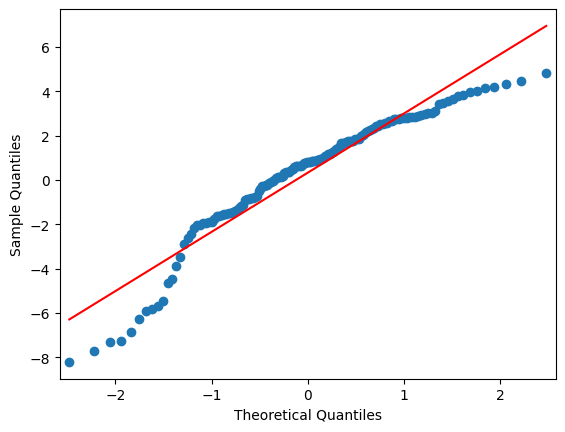

In [109]:
from sklearn.linear_model import Ridge

X = sleep_df.copy().drop("Sleep Quality", axis=1)
X["Awakenings"] = X["Awakenings"].fillna(X["Awakenings"].mean())
X["Alcohol consumption"] = X["Alcohol consumption"].fillna(X["Alcohol consumption"].mean())
X["Caffeine consumption"] = X["Caffeine consumption"].fillna(X["Caffeine consumption"].mean())
X["Exercise frequency"] = X["Exercise frequency"].fillna(X["Exercise frequency"].mean())
y = sleep_df.copy().loc[:, "Sleep Quality"]

model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(X, y, Ridge(alpha=0.5))
print(f"Ridge Regression model with missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}")

for coefficient, value in coeff.items():
    print(coefficient, value)

check_assumptions(y_pred, y_test)

Lasso Regression model with missing values set to mean has a MSE of 7.207254680174328 and R2 of 0.5367389883157665
Age 0.0475142158132805
Gender 2.086098705510917
Bedtime 0.2446205110459301
Wakeup time 1.924184060883745
Sleep duration 0.10491812528486485
Sleep efficiency -0.031200085305892734
REM sleep percentage 0.23302785051949718
Deep sleep percentage -0.10340031980067452
Light sleep percentage -0.23672622610850488
Awakenings -0.33875178667496064
Caffeine consumption 0.4527349709317382
Alcohol consumption -0.0
Smoking status -1.3955316129136504
Exercise frequency -2.062666020492122


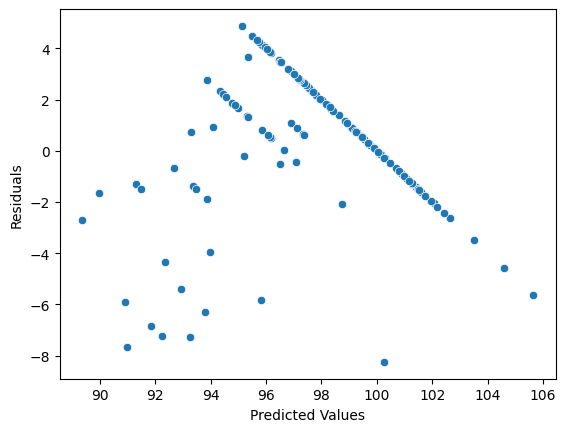

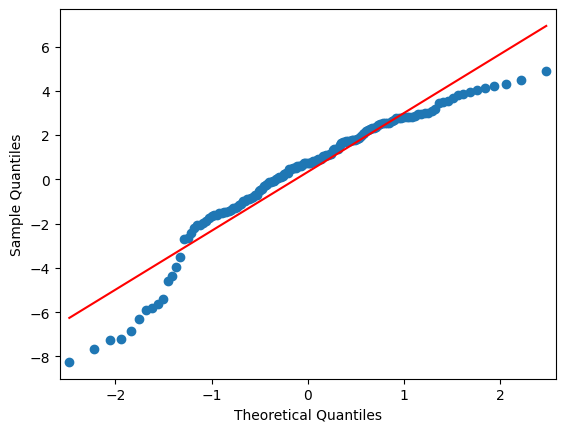

In [116]:
from sklearn.linear_model import Lasso

X = sleep_df.copy().drop("Sleep Quality", axis=1)
X["Awakenings"] = X["Awakenings"].fillna(X["Awakenings"].mean())
X["Alcohol consumption"] = X["Alcohol consumption"].fillna(X["Alcohol consumption"].mean())
X["Caffeine consumption"] = X["Caffeine consumption"].fillna(X["Caffeine consumption"].mean())
X["Exercise frequency"] = X["Exercise frequency"].fillna(X["Exercise frequency"].mean())
y = sleep_df.copy().loc[:, "Sleep Quality"]

model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(X, y, Lasso(alpha=0.001))
print(f"Lasso Regression model with missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}")

for coefficient, value in coeff.items():
    print(coefficient, value)

check_assumptions(y_pred, y_test)

## Non linear regression

In [131]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

X = sleep_df.copy().drop("Sleep Quality", axis=1)
X["Awakenings"] = X["Awakenings"].fillna(X["Awakenings"].mean())
X["Alcohol consumption"] = X["Alcohol consumption"].fillna(
    X["Alcohol consumption"].mean()
)
X["Caffeine consumption"] = X["Caffeine consumption"].fillna(
    X["Caffeine consumption"].mean()
)
X["Exercise frequency"] = X["Exercise frequency"].fillna(X["Exercise frequency"].mean())
y = sleep_df.copy().loc[:, "Sleep Quality"]

grid_svm = GridSearchCV(
    estimator=SVR(),
    param_grid={
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "degree": [1, 2, 3, 4, 5],
        "C": [0.1, 1, 10, 100],
    },
    cv=5,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(), categorical_cols),
    ]
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

grid_svm.fit(X_train_scaled, y_train)
print("Best parameters found: ", grid_svm.best_params_)

# Print the best score
print("Best score found: ", grid_svm.best_score_)

Best parameters found:  {'C': 10, 'degree': 2, 'kernel': 'poly'}
Best score found:  0.7628710640276288


In [132]:
model_mse, model_r2, y_pred, y_test, _ = evaluate_model(X, y, SVR(C=10, degree=2, kernel="poly"))
print(f"Support Vector Machine Regression model with missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}")

Support Vector Machine Regression model with missing values set to mean has a MSE of 3.0669432112353805 and R2 of 0.8028659624415231
